In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score

In [13]:
import ssl
from urllib.request import urlopen
ssl._create_default_https_context = ssl._create_unverified_context
url='https://es.wikipedia.org/wiki/Buenos_Aires'
pagina=pd.read_html(url)

In [14]:
df_homicidios=pd.read_csv('Recursos_dashboard\Datos_homicidios.csv')

In [15]:
# Extraer el mes de la fecha y calcular el semestre
df_homicidios['FECHA']=pd.to_datetime(df_homicidios['FECHA'])

In [16]:
df_homicidios['SEMESTRE'] = ((df_homicidios['FECHA'].dt.month-1)//6)+1

In [17]:
df_homicidios.sample(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Longitud,Latitud,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
113,2016-0142,1,2016-11-05,2016,11,5,23:30:00,23,AV DEL LIBERTADOR Y AV RAMOS MEJIA,AVENIDA,...,-58.37533517,-34.59276462,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,46.0,2016-11-05 00:00:00,2
7,2016-0010,1,2016-01-29,2016,1,29,15:20:00,15,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.50877521,-34.66977709,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-29 00:00:00,1
157,2017-0016,1,2017-02-03,2017,2,3,05:12:21,5,"AU 25 DE MAYO, KILOMETRO 8.3, SENTIDO HACIA PR...",AUTOPISTA,...,-58.38099494,-34.62288231,MOTO-CARGAS,CARGAS,CONDUCTOR,MOTO,MASCULINO,27.0,2017-02-04 00:00:00,1
604,2020-0065,1,2020-12-05,2020,12,5,16:00:00,16,"PAZ, GRAL. AV. Y GOYENECHE, ROBERTO PARQUE AV.",GRAL PAZ,...,-58.49332664,-34.54836855,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,24.0,2020-12-06 00:00:00,2
453,2019-0018,1,2019-03-03,2019,3,3,23:30:00,23,"CANTILO, INT. Y UDAONDO, GUILLERMO AV.",AUTOPISTA,...,-58.44927253,-34.54048625,PEATON-AUTO,AUTO,PEATON,PEATON,FEMENINO,29.0,2019-03-03 00:00:00,1


In [18]:
df_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'Longitud', 'Latitud',
       'PARTICIPANTES', 'ACUSADO', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'SEMESTRE'],
      dtype='object')

In [19]:
poblacion=pagina[4].copy()

In [20]:
poblacion

Población histórica                    
                   Año       Pob.       ±%
0                 1779     24 205        —
1                 1810     44 800   +85.1%
2                 1869    177 797  +296.9%
3                 1895    663 854  +273.4%
4                 1914  1 575 814  +137.4%
5                 1947  2 981 043   +89.2%
6                 1960  2 966 634    −0.5%
7                 1970  2 972 453    +0.2%
8                 1980  2 922 829    −1.7%
9                 1991  2 965 403    +1.5%
10                2001  2 776 138    −6.4%
11                2010  2 890 151    +4.1%
12                2022  3 120 612    +8.0%

victimas_por_semestre=

In [21]:
homicidios_semestre = df_homicidios.groupby(['AAAA', 'SEMESTRE'])['N_VICTIMAS'].sum().reset_index()
homicidios_semestre


,AAAA,SEMESTRE,N_VICTIMAS
0,2016,1,65
1,2016,2,81
2,2017,1,69
3,2017,2,71
4,2018,1,70
5,2018,2,79
6,2019,1,57
7,2019,2,47
8,2020,1,31
9,2020,2,50


In [22]:
poblacion.columns=poblacion.columns.droplevel(0)

In [23]:
poblacion['Pob.']=poblacion['Pob.'].str.replace("\xa0",'')
poblacion=poblacion.rename(columns={'Pob.':'Poblacion'})

In [24]:
X=poblacion.Año.values.reshape(-1,1)
y=poblacion.Poblacion.values.reshape(-1,1)
X_selected = X.tolist()  # Convierte X_selected a lista
y_selected = y.tolist() 

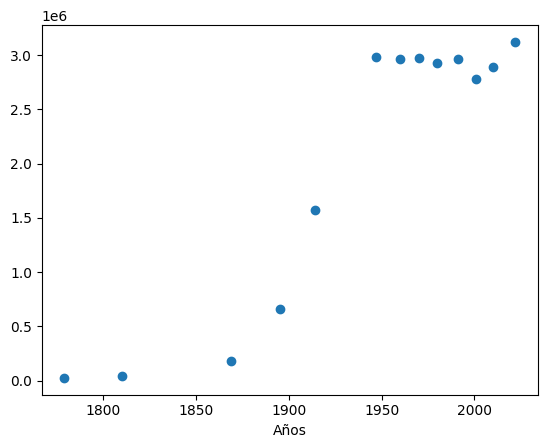

In [25]:
plt.scatter(X_selected,y_selected)
plt.xlabel('Años')
plt.show()

In [26]:
poly = PolynomialFeatures(degree=35)
X_poly = poly.fit_transform(X_selected,y_selected)

In [27]:
linear_regression = LinearRegression()
linear_regression.fit(X_poly,y_selected)

LinearRegression()

In [28]:
y_head2 = linear_regression.predict(X_poly)

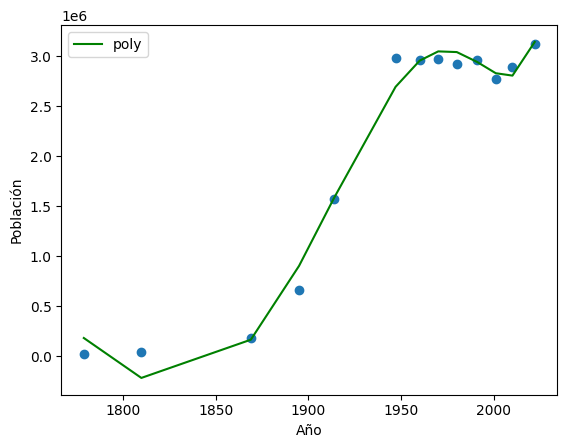

In [29]:
# Crear la gráfica
plt.plot(X_selected,y_head2,color='green',label='poly')
plt.legend()
plt.scatter(X_selected, y_selected)
plt.xlabel('Año')
plt.ylabel('Población')
plt.show()

In [30]:
r2_score(y,y_head2)

0.9869452761268179

In [31]:
def predicted_population(year):
    X_pred = poly.transform([[year]])
    predicted_population = linear_regression.predict(X_pred)
    return int(predicted_population)

In [32]:
homicidios_semestre['Poblacion']=homicidios_semestre['AAAA'].apply(predicted_population)

In [33]:
homicidios_semestre

,AAAA,SEMESTRE,N_VICTIMAS,Poblacion
0,2016,1,65,2899099
1,2016,2,81,2899099
2,2017,1,69,2927500
3,2017,2,71,2927500
4,2018,1,70,2960408
5,2018,2,79,2960408
6,2019,1,57,2998148
7,2019,2,47,2998148
8,2020,1,31,3041063
9,2020,2,50,3041063


In [34]:
homicidios_semestre['%_homicidios']=round((homicidios_semestre['N_VICTIMAS']/homicidios_semestre['Poblacion'])*100000,3)

In [35]:
homicidios_semestre

,AAAA,SEMESTRE,N_VICTIMAS,Poblacion,%_homicidios
0,2016,1,65,2899099,2.242
1,2016,2,81,2899099,2.794
2,2017,1,69,2927500,2.357
3,2017,2,71,2927500,2.425
4,2018,1,70,2960408,2.365
5,2018,2,79,2960408,2.669
6,2019,1,57,2998148,1.901
7,2019,2,47,2998148,1.568
8,2020,1,31,3041063,1.019
9,2020,2,50,3041063,1.644


In [36]:
def percentage_difference(df,column:str,target):
    df=df.copy()
    for index, row in df.iterrows():
        if index !=0:
            df.at[index,'target']=round(pasado-((pasado*target)/100),3)
        if index==0:
            df.at[index,'target']=np.nan
        pasado=row[column]
    return df

In [37]:
homicidios_semestre = percentage_difference(homicidios_semestre,'%_homicidios',10)

homicidios_semestre['AAAA-SEMESTRE']=homicidios_semestre['AAAA'].astype(str) + ' - ' + homicidios_semestre['SEMESTRE'].astype(str)
homicidios_semestre

,AAAA,SEMESTRE,N_VICTIMAS,Poblacion,%_homicidios,target,AAAA-SEMESTRE
0,2016,1,65,2899099,2.242,NaN,2016 - 1
1,2016,2,81,2899099,2.794,2.018,2016 - 2
2,2017,1,69,2927500,2.357,2.515,2017 - 1
3,2017,2,71,2927500,2.425,2.121,2017 - 2
4,2018,1,70,2960408,2.365,2.182,2018 - 1
5,2018,2,79,2960408,2.669,2.129,2018 - 2
6,2019,1,57,2998148,1.901,2.402,2019 - 1
7,2019,2,47,2998148,1.568,1.711,2019 - 2
8,2020,1,31,3041063,1.019,1.411,2020 - 1
9,2020,2,50,3041063,1.644,0.917,2020 - 2


In [38]:
homicidios_semestre.to_csv('Recursos_dashboard/Homicidios_KPI.csv', index=False)

In [39]:
año2022=predicted_population(2022)
año2022

3143854

In [40]:
kpi_motos = df_homicidios[df_homicidios['VICTIMA']=='MOTO']
kpi_motos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Longitud,Latitud,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47533969,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 00:00:00,1
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.39040293,-34.63189362,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 00:00:00,1
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.46503904,-34.68092974,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18.0,SD,1
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.38718297,-34.62246630,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 00:00:00,1
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,-58.44451316,-34.68475866,MOTO-OBJETO FIJO,OBJETO FIJO,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-24 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,...,-58.47633683,-34.62140594,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,41.0,2021-12-11 00:00:00,2
710,2021-0091,1,2021-12-11,2021,12,11,23:00:00,23,BAIGORRIA Y VICTOR HUGO,CALLE,...,-58.51989389,-34.62284918,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,24.0,2021-12-11 00:00:00,2
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-58.43353773,-34.64561636,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18 00:00:00,2
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.46739825,-34.65117757,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20 00:00:00,2


In [41]:
kpi_motos = kpi_motos.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()
kpi_motos

,AAAA,N_VICTIMAS
0,2016,65
1,2017,56
2,2018,57
3,2019,50
4,2020,29
5,2021,46


In [42]:
def last(df,column):
    df=df.copy()
    for index, row in df.iterrows():
        if index !=0:
            df.at[index,'last_year']=pasado
        if index==0:
            df.at[index,'last_year']=np.nan
        pasado=row[column]
    return df

In [43]:
kpi_motos['Poblacion'] = kpi_motos['AAAA'].apply(predicted_population)
kpi_motos['%_homicidios'] = round((kpi_motos['N_VICTIMAS']/kpi_motos['Poblacion'])*100000,3)
kpi_motos = percentage_difference(kpi_motos,'%_homicidios',7)
kpi_motos = last(kpi_motos, 'N_VICTIMAS')
kpi_motos

,AAAA,N_VICTIMAS,Poblacion,%_homicidios,target,last_year
0,2016,65,2899099,2.242,NaN,NaN
1,2017,56,2927500,1.913,2.085,65.0
2,2018,57,2960408,1.925,1.779,56.0
3,2019,50,2998148,1.668,1.790,57.0
4,2020,29,3041063,0.954,1.551,50.0
5,2021,46,3089508,1.489,0.887,29.0


In [44]:
kpi_motos.to_csv('Recursos_dashboard/kpi_motos.csv', index=False)

In [45]:
kpi_avenidas = df_homicidios[df_homicidios['TIPO_DE_CALLE']=='AVENIDA']
kpi_avenidas = kpi_avenidas.groupby('AAAA')['TIPO_DE_CALLE'].count().reset_index()
kpi_avenidas['Poblacion'] = kpi_avenidas['AAAA'].apply(predicted_population)
kpi_avenidas['%_homicidios'] = round((kpi_avenidas['TIPO_DE_CALLE']/kpi_avenidas['Poblacion'])*100000,3)
kpi_avenidas = percentage_difference(kpi_avenidas,'%_homicidios',5)
kpi_avenidas = last(kpi_avenidas, 'TIPO_DE_CALLE')
kpi_avenidas

,AAAA,TIPO_DE_CALLE,Poblacion,%_homicidios,target,last_year
0,2016,91,2899099,3.139,NaN,NaN
1,2017,81,2927500,2.767,2.982,91.0
2,2018,93,2960408,3.141,2.629,81.0
3,2019,64,2998148,2.135,2.984,93.0
4,2020,52,3041063,1.710,2.028,64.0
5,2021,61,3089508,1.974,1.624,52.0


In [46]:
kpi_avenidas.to_csv('Recursos_dashboard/kpi_avenidas.csv', index=False)